# Recycling Robot
> Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press. (Example 6.2)

- **states**: $1 .. N$
- **actions**: `move`
- **transition**: pick a state $[s \in s-k:s-1 ; s+1:s+k] $ with uniform probability
- **terminal**: $s \leq 1 \vee s \geq N$
- **reward**: 
    - $s \leq 1 \rightarrow -1$
    - $s \geq N \rightarrow +1$
    - $1 < s < N \rightarrow 0$

In [1]:
from mdp.model import MDP, Transition
from collections import defaultdict
import numpy as np

**Generate transitions**

In [2]:
start, end, step = 0, 9, 2
states = list(range(start, end+1))
conf = []
for s in states:
    s_primes = np.append(np.arange(s-step, s), np.arange(s+1, s+step+1))
    P = defaultdict(lambda: 0)
    for s_prime in s_primes:
        if s_prime <= start:
            P[start] += 1
        elif s_prime >= end:
            P[end] += 1
        else:
            P[s_prime] += 1
    for s_prime, value in P.items():
        reward = 0
        if s_prime == start:
            reward = -1
        elif s_prime == end:
            reward = 1
        conf.append(Transition(s, 0, s_prime, value / sum(P.values()), reward))

In [3]:
mdp = MDP(10, 1, config=conf, gamma=1)
mdp.set_state_names(**dict([(str(i+1), i) for i in range(10)]))
mdp.set_action_names(move=0)

In [4]:
table = mdp.to_table()
print(table)

   state action s_prime  probability  reward
0      1   move       1         0.50    -1.0
1      1   move       2         0.25     0.0
2      1   move       3         0.25     0.0
3      2   move       1         0.50    -1.0
4      2   move       3         0.25     0.0
5      2   move       4         0.25     0.0
6      3   move       1         0.25    -1.0
7      3   move       2         0.25     0.0
8      3   move       4         0.25     0.0
9      3   move       5         0.25     0.0
10     4   move       2         0.25     0.0
11     4   move       3         0.25     0.0
12     4   move       5         0.25     0.0
13     4   move       6         0.25     0.0
14     5   move       3         0.25     0.0
15     5   move       4         0.25     0.0
16     5   move       6         0.25     0.0
17     5   move       7         0.25     0.0
18     6   move       4         0.25     0.0
19     6   move       5         0.25     0.0
20     6   move       7         0.25     0.0
21     6  

### Set a policy

In [5]:
from mdp.policy import Policy
import numpy as np 

In [6]:
print(mdp.action_id)
print(mdp.state_id)

{'move': 0}
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}


In [7]:
class DummyPolicy(Policy):
    def __getitem__(self, state: int) -> int:
        return 0

In [8]:
move = DummyPolicy(mdp)

#### Policy Evaluation

$$
V_t(s) = Q_{t-1}(s, \pi_s)
$$
$$
Q_{t-1}(s, \pi_s) = \sum\limits_{s'} T(s, a, s')\left[ reward(s, \pi_s, s') + \gamma  V_{t-1}(s')\right]
$$

In [9]:
from mdp.algorithms import policy_evaluation

In [10]:
values = policy_evaluation(policy=move, mdp=mdp)
print(values)

[-4.28089888 -3.75280899 -2.80898876 -1.64044944 -0.56179775  0.56179775
  1.64044944  2.80898876  3.75280899  4.28089888]


In [11]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


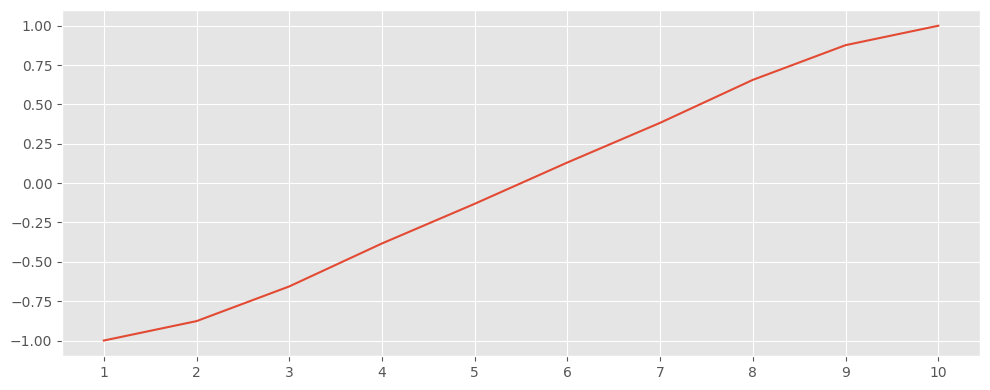

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(end+1), values / values.max())
ax.set_xticks(range(end+1))
ax.set_xticklabels([str(i+1) for i in range(end+1)])
plt.tight_layout()
plt.show()

#### Value Iteration
$$
    V^{*}_{t(s)} = \max\limits_a Q^{*}_{t-1}(s, a)
$$
$$
    Q^{*}_{t-1}(s, a) = \sum\limits_{s'} T(s, a, s')\left[reward(s, a, s') + \gamma  V^{*}_{t-1}(s')\right]
$$

In [13]:
from mdp.algorithms import value_iteration

In [14]:
V_star, Pi_star, value_history, policy_history = value_iteration(mdp=mdp)

In [15]:
print(V_star)
for s, a in Pi_star.items():
    print("{} {}".format(mdp.states[s], mdp.actions[a]))

[-4.28089888 -3.75280899 -2.80898876 -1.64044944 -0.56179775  0.56179775
  1.64044944  2.80898876  3.75280899  4.28089888]
1 move
2 move
3 move
4 move
5 move
6 move
7 move
8 move
9 move
10 move


#### Policy Iteration

When we have a policy $\pi$, for all states $s$, we can find a greedy policy $\pi'$ by:
$$
\pi'(s) = \arg\max\limits_{a} \sum\limits_{s'}p(s'\mid s, a) \left [ r(s, a, s') + \gamma V_{\pi}(s')\right ]
$$
**Note**: suppose that $\pi'$ is not better than the old policy $\pi$. Then $V_{\pi} = V_{\pi'}$. Thus we can rewrite:
$$
V_{\pi'}(s) = \max\limits_{a} \sum\limits_{s'}p(s'\mid s, a) \left [ r(s, a, s') + \gamma V_{\pi'
}(s')\right ]
$$
Now, since (7) is the **Bellman optimality equation** $V_{\pi'}$ must be $V^*$ and both $\pi$ and $\pi'$ must be optimal policies. Thus policy improvement **always gives us a strictly better policy except when the policy is already optimal**.

In [16]:
from mdp.algorithms import policy_iteration

In [17]:
pi, history = policy_iteration(mdp)

In [18]:
for s in mdp.states:
    print("{} {}".format(mdp.states[s], mdp.actions[pi[s]]))

1 move
2 move
3 move
4 move
5 move
6 move
7 move
8 move
9 move
10 move


In [19]:
history

[({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
  array([-4.28089888, -3.75280899, -2.80898876, -1.64044944, -0.56179775,
          0.56179775,  1.64044944,  2.80898876,  3.75280899,  4.28089888]))]